### NetCDF Data extractor
This notebook has the necessary functions to extract data from a netCDF.   It will create a Time series plot for the change of physical parameters through a given time and location.

In [19]:
# import library set
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxr
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [20]:
# include your time of intesret and location of interest
start_date = '2021-06-30'
end_date ='2021-09-01'
# include point of interest, You may see the acceptable range runnig next 3 cells, you know your data anyway
lat_of_interest = 33 # 40.367474
lon_of_interest = -90 #-82.996216

In [21]:
# identifying closet value in the lat long array
def nearest_point(location_array, location_of_interest):
    """
    This function search for the nearest lat from
    a netcdf lat array.
    input: netcdf lat array, lat in mind
    output: nearest  lat
    useage: in this way we can copy the data value nearest to our location
    from the raster, unless xarray raise errors
    """
    # index of nearest
    idx = np.abs(location_array - location_of_interest).argmin()
    # slice it and return
    return location_array[idx]

In [27]:
# read nc file from source
fn = './input/pr_2021.nc'
precep = xr.open_dataset(fn)
# see attribute data
metadata = precep.attrs
# slice metadata
print(metadata['note2'])
# print all metadata
#print(precep)

Citation: Abatzoglou, J.T., 2013, Development of gridded surface meteorological data for ecological applications and modeling, International Journal of Climatology, DOI: 10.1002/joc.3413


In [28]:
# use rio.crs from rioxarray to see CRS/SRS
crs_precep = precep.rio.crs
print(crs_precep)
# see max and min lat lon values
print('min lat is {} and max lat is {}'.format(precep["precipitation_amount"]["lat"].values.min(),
                                               precep["precipitation_amount"]["lat"].values.max()))
# see max and min lon values
print('min lon is {} and max lon is {}'.format(precep["precipitation_amount"]["lon"].values.min(),
                                              precep["precipitation_amount"]["lon"].values.max()))

# see data range
print('date range for data is {} to {}'.format
      (precep["precipitation_amount"]["day"].values.min(),
      precep["precipitation_amount"]["day"].values.max()))

EPSG:4326
min lat is 25.066666666666666 and max lat is 49.400000000000006
min lon is -124.76666663333334 and max lon is -67.05833330000002
date range for data is 2021-01-01T00:00:00.000000000 to 2021-12-31T00:00:00.000000000


In [24]:
# Extract data
# use commenting properly
#loc = 400 
# alternatively define a single point using following lines
#lat = precep["precipitation_amount"]["lat"].values[loc]
#lon = precep["precipitation_amount"]["lon"].values[loc]
# nearest lat using function
lat = nearest_point(precep["precipitation_amount"]["lat"], lat_of_interest )
lon = nearest_point(precep["precipitation_amount"]["lon"], lon_of_interest )# print values for 400 postion
print('lat %d and lon %d' % (lat, lon)) 
# precipitation value
point_precep = precep["precipitation_amount"].sel(lat=lat,
                                                 lon=lon,
                                                 #day=slice(start_date,end_date)
                                                 )
point_precep

lat 32 and lon -90


<xarray.DataArray 'precipitation_amount' (day: 365)>
array([0. , 0. , 0. , ..., 7.6, 0.5, 0. ], dtype=float32)
Coordinates:
    lon      float64 -90.02
    lat      float64 32.98
  * day      (day) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-12-31
Attributes:
    units:              mm
    description:        Daily Accumulated Precipitation
    long_name:          pr
    standard_name:      pr
    dimensions:         lon lat time
    grid_mapping:       crs
    coordinate_system:  WGS84,EPSG:4326
    coordinates:        lon lat time

[netcdf tutorial](https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/use-netcdf-in-python-xarray/)

[slice using shape](https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/subset-netcdf4-climate-data-spatially-aoi/)

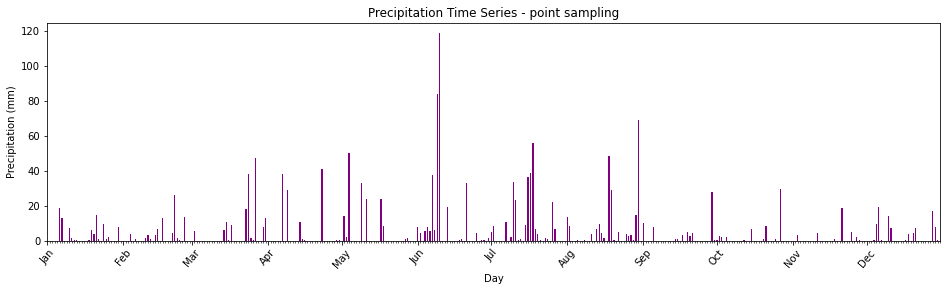

In [29]:
# create barplot for showling data
# bar data
precepitation = point_precep
# time data
time = precepitation["day"]
# uncomment for year around data
#time = precep["precipitation_amount"]["day"]
# create figure object
fig, (ax1)= plt.subplots(figsize=(16,4))
#ploting bars
ax1.bar(time,precepitation,
       color='purple',
       width=0.5)
# add tittle
ax1.set(title='Precipitation Time Series - point sampling')
# x y axis lables
plt.xlabel('Day')
plt.ylabel('Precipitation (mm)')
# month location
months = mdates.MonthLocator()
# days location
days = mdates.DayLocator()
# months format when display
monthFmt = mdates.DateFormatter('%b')
# set locators to axis
ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_minor_locator(days)
# set display day formatter to axis
ax1.xaxis.set_major_formatter(monthFmt)
# set x axis limits
ax1.set_xlim(time.min(), time.max())
# x tick rotation
plt.xticks(rotation=50)
plt.show()

In [26]:
# cast netcdf data into a dataframe
precep_df = precepitation.to_dataframe()
precep_df
# Save file if needed

,lon,lat,precipitation_amount
day,,,
2021-01-01,-90.016667,32.983333,0.000000
2021-01-02,-90.016667,32.983333,0.000000
2021-01-03,-90.016667,32.983333,0.000000
2021-01-04,-90.016667,32.983333,0.000000
2021-01-05,-90.016667,32.983333,0.000000
...,...,...,...
2021-12-27,-90.016667,32.983333,0.000000
2021-12-28,-90.016667,32.983333,17.200001
2021-12-29,-90.016667,32.983333,7.600000
